# Titianic - How Rose survives and why Jack dies ?

In this Titanic dataset we will analyse the factors which have contributed to the person's survival.
We will use the Logistic Regression to predict if the person is survived or not.

Let us import the necessary librariers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

Load the Titanic dataset

In [2]:
data = pd.read_csv(r"C:\Users\Guestuser\Downloads\Titanic\all\train.csv")

Print top few rows to understand about the data

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

How many passengers are there ?

In [4]:
print("# of passengers in dataset:"+str(len(data)))

# of passengers in dataset:891


Let us analyse the data by creating the different plots

How many passengers survived ?

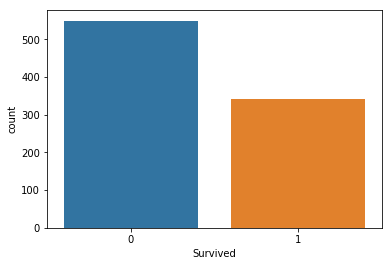

In [5]:
sns.countplot(x = "Survived", data = data);

passengers survived based on the gender wise

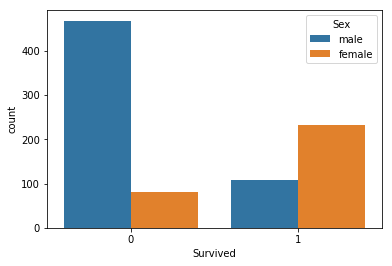

In [6]:
sns.countplot(x = "Survived", hue = "Sex", data = data);

Passengers survived based on the passenger class

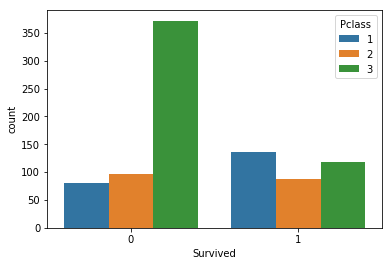

In [7]:
sns.countplot(x = "Survived", hue ="Pclass", data = data);

Let us explore the age of the passengers

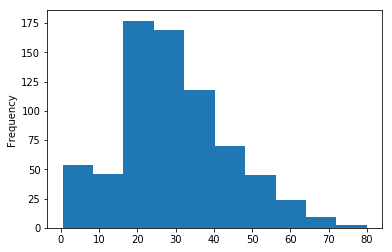

In [8]:
data["Age"].plot.hist();

Let us check the fare details also

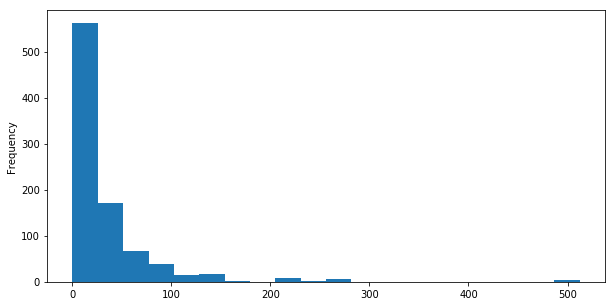

In [9]:
data["Fare"].plot.hist(bins = 20, figsize=(10,5));

Let us analyse the columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


check the siblings status on the ship

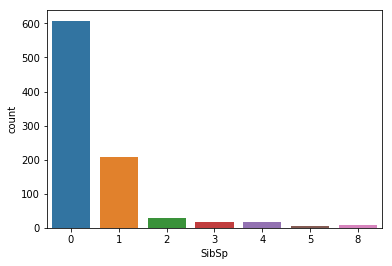

In [11]:
sns.countplot(x="SibSp", data = data);

Data Cleaning / Data Wrangling ( we will remove  unnecessary columns wherever possible )

In [12]:
data.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False   True  False  False   False   
6          False     False   False  False  False  False  False  False   False   
7          False     False   False  False  False  False  False  False   False   
8          False     False   False  False  False  False  False  False   False   
9          False     False   False  False  False  False  False  False   False   
10         False     False   False  False  False  False  False  False   False   
11         False     False   False  False  False  False  False  False   False   
12         False     False   False  False  False  False  False  False   False   
13         False     False   False  False  False  False  False  False   False   
14         False     False   False  False  False  False  False  False   False   
15         False     False   False  False  False  False  False  False   False   
16         False     False   False  False  False  False  False  False   False   
17         False     False   False  False  False   True  False  False   False   
18         False     False   False  False  False  False  False  False   False   
19         False     False   False  False  False   True  False  False   False   
20         False     False   False  False  False  False  False  False   False   
21         False     False   False  False  False  False  False  False   False   
22         False     False   False  False  False  False  False  False   False   
23         False     False   False  False  False  False  False  False   False   
24         False     False   False  False  False  False  False  False   False   
25         False     False   False  False  False  False  False  False   False   
26         False     False   False  False  False   True  False  False   False   
27         False     False   False  False  False  False  False  False   False   
28         False     False   False  False  False   True  False  False   False   
29         False     False   False  False  False   True  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
861        False     False   False  False  False  False  False  False   False   
862        False     False   False  False  False  False  False  False   False   
863        False     False   False  False  False   True  False  False   False   
864        False     False   False  False  False  False  False  False   False   
865        False     False   False  False  False  False  False  False   False   
866        False     False   False  False  False  False  False  False   False   
867        False     False   False  False  False  False  False  False   False   
868        False     False   False  False  False   True  False  False   False   
869        False     False   False  False  False  False  False  False   False   
870        False     False   False  False  False  False  False  False   False   
871        False     False   False  False  False  False  False  False   False   
872        False     False   False  False  False  False  False  False   False   
873        False     False   False  False  False  False  False  False   False   
874        False     False   False  False  False  False  False  False   False   
875        False     False   False  False  False  False  False  False   False   
876        False     False   False  False  False  False  False  False   False   
877        False     False   False  False  False  False  False  False   False   
878        False     False   False  

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above data we can notice that there are missing values in Age, Cabin and Embarked

Let us see the null values using the heatmap

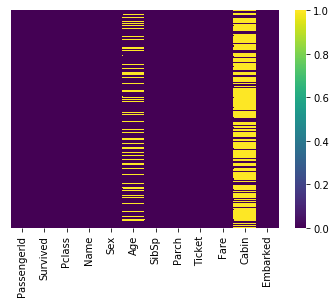

In [14]:
sns.heatmap(data.isnull(), yticklabels = False, cmap="viridis")

Let us analyse the age column

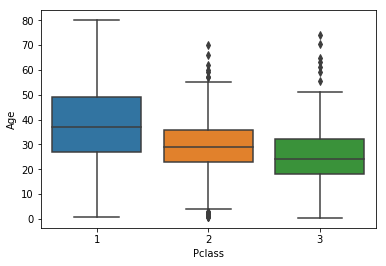

In [15]:
sns.boxplot(x = "Pclass", y = "Age", data = data);

From the above we can notice that the passengers travelling in the first class and second class are older than the 3rd class

Imputation : we can drop the missing values or fill in some other values

In the data set we have the column Survived which categorical.
So we apply Logistic regression on the columns ( i.e we need to predict the y value )

The cabin column has lot of null values, so we drop them

In [16]:
data.drop("Cabin", axis = 1, inplace = True)

drop all NA values

In [17]:
data.dropna(inplace = True)

Let use the heatmap again to check null values removed or not

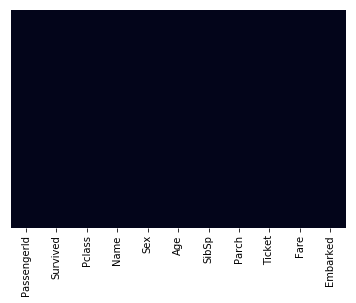

In [18]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False);

Let us check table again

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now our data set is clean

We see a lot of string values in our dataset, we need to convert it to categorical variables inorder to implement logistic regression. So the process is we will convert this to categorical variable into dummy variable as logistic regression takes only two values. So we will be creating dummy variables.

In [20]:
pd.get_dummies(data['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
6         0     1
7         0     1
8         1     0
9         1     0
10        1     0
11        1     0
12        0     1
13        0     1
14        1     0
15        1     0
16        0     1
18        1     0
20        0     1
21        0     1
22        1     0
23        0     1
24        1     0
25        1     0
27        0     1
30        0     1
33        0     1
34        0     1
35        0     1
37        0     1
38        1     0
..      ...   ...
856       1     0
857       0     1
858       1     0
860       0     1
861       0     1
862       1     0
864       0     1
865       1     0
866       1     0
867       0     1
869       0     1
870       0     1
871       1     0
872       0     1
873       0     1
874       1     0
875       1     0
876       0     1
877       0     1
879       1     0
880       1     0
881       0     1
882       1     0
883       0     1
884       0     1
885       1     0
886       0     1
887       1     0
889       0     1
890       0     1

[712 rows x 2 columns]

So '0' basically tells its not afemale and 1 tells it's a female column. Similar is the case with male column.

We don't require both these columns. One column is enough to enough to tell whether it is male or female. So we will keep only one column, male column in this case. 

In [21]:
sex = pd.get_dummies(data['Sex'], drop_first = True)

So the female column is dropped and let us print few columns

In [22]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

Similarly we apply the dummy function on Embarked column also:

In [23]:
embark = pd.get_dummies(data['Embarked'])
embark.head()

C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1

we have C, Q and S columns. Here also we can drop the first column as the other two columns are enough where it tells if the passenger is travelling for Q(Queen's town), S(Southampton) or if the both these values are 0 then we can assume that he/she is travelling for C(Cherbourg).

So let us drop the first value

In [24]:
embark = pd.get_dummies(data['Embarked'], drop_first=True)
embark.head(5)

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

Applying dummy function on Pclass

In [25]:
pcl = pd.get_dummies(data['Pclass'])
pcl.head()

1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1

In [26]:
pcl = pd.get_dummies(data['Pclass'], drop_first = True)
pcl.head()

2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1

We have 2 and 3, meaning if both these values are 0 then the passenger is travelling in the 1st class.

So the next step is we will concatenate all the above categorical values to the dataset

In [27]:
data = pd.concat([data, sex, embark, pcl], axis = 1)
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  1  0  0  
4      0            373450   8.0500        S     1  0  1  0  1

It's time to drop the Pclass, Sex, and Embarked categorical data columns

In [28]:
data.drop(['Sex', 'Embarked', 'Pclass', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
data.head()

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

## Train and Test data

we will build the model on the train data and predict output on test data

In [29]:
X = data.drop("Survived", axis = 1)

in the above, except Survived all other columns will become the independent variables ( i.e features )

In [30]:
Y = data["Survived"]  # this is our target variable

We will split data in training and test data sets

In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We will train and predict by creating a model.

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(X_test)

It is time to evaluate how the model is performaing.

We can find the accuracy or classification report 

In [33]:
from sklearn.metrics import classification_report
classification_report(Y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

Now let find the accuracy by creating a confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

calculate accuracy

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.7850467289719626

So we got 78% accuracy